# Part 1 Spam detection filter with nltk library

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\joelw\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
len(messages)

5574

In [7]:
#print out the first 10 messages and number them using enumerate
for mess_no, message in enumerate(messages[0:10]):
    print(mess_no, message)
    print('\n')
    #we can clearly see that some of the messages are ham and some are spam

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
#lets seperate the classification (ham/spam) using pandas
import pandas as pd
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
#create a new column with message length
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
#visualize message length
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

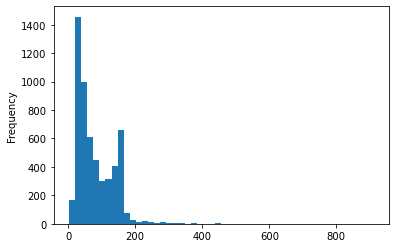

In [15]:
messages['length'].plot.hist(bins = 50)

In [26]:
messages['length'].describe()
#there's a few messages with a lot of characters (max of 910)

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [30]:
messages[messages['length'] > 900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F35C8EA58>,
      dtype=object)

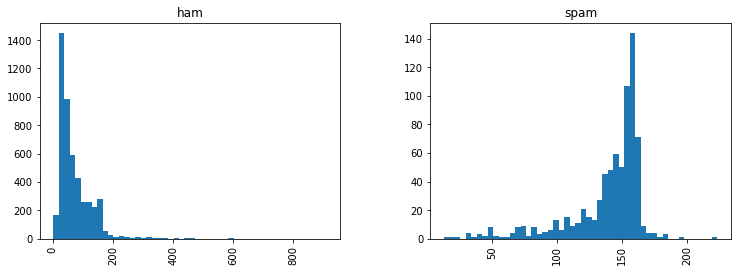

In [32]:
#create a histogram for each label type
messages.hist(column = 'length', by = 'label', bins = 50, figsize = (12,4))

In [34]:
#find stats one message length by type
messages.groupby(by = 'label')['length'].describe()
#it looks like length could be one important factor for distinguishing ham vs spam

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


# Part 2 Text pre-processing

In [36]:
#the main issue with our data is that it's all in text format and the classification algorithms
#we've already learned about so far actually need some numerical feature vector in order to perform the classification

#there are many methods where you can convert a corpus of strings to a vector format
#the simplest approach is bag of words

#### Here's a small sample of what we'll be doing

In [54]:
#we'll remove all punctuation from the messages
import string
mess = 'Sample message! Notice: it has punctuation.'
print(string.punctuation)
print('\n')
nopunc = [c for c in mess if c not in string.punctuation]
print(nopunc)
print('\n')
#here are the stop words we'll also be removing
from nltk.corpus import stopwords
print(stopwords.words('english'))
print('\n')
#lets joing the nopunch list back into a single string (with pun removed)
nopunc = ''.join(nopunc)
print(nopunc)
print('\n')
#now lets split the nopunch string into individual words
nopunc = nopunc.split(' ')
print(nopunc)
print('\n')
#and remove all the stopwords
clean_mess = [word for word in nopunc if word.lower() not in stopwords.words('english')]
print(clean_mess)
print('\n')
#we're left with only the most important words

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',

#### Actual function we can plug into our entire df

In [55]:
def text_process(mess):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split(' ') if word.lower() not in stopwords.words('english')]
#we'll pass this function in later

In [85]:
messages['message'].head(10).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, treat, like, aids...
7    [per, request, Melle, Melle, Oru, Minnaminungi...
8    [WINNER, valued, network, customer, selected, ...
9    [mobile, 11, months, U, R, entitled, Update, l...
Name: message, dtype: object

## Vectorization

#### Three main steps using the bag of words model
#### 1. Count how many times does a word occur in each message (term frquency)
#### 2. Weigh the counts, so the frequent tokens get lower weight (inverse document frequency)
#### 3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])
#the text_process function is applies to messages['message']
#here we're creating a very large matrix

In [90]:
print(len(bow_transformer.vocabulary_))
#prints the total number of unique vocab words

11427


#### Lets take a single sample message

In [100]:
# take 1 sample text message and get its bag of words count as a vector using the bow_tranformer
mess4 = messages['message'][3]
print(mess4)
#of the 11427 columns in the matrix, only 7 columns have words from this message
#this message contains 2 of word 4069 and word 9556
bow4 = bow_transformer.transform([mess4])
print(bow4)
print(bow4.shape)
#we can plug those values above as an index into .get_feature_names() method to get what that exact word is
print(bow_transformer.get_feature_names()[4069])
print(bow_transformer.get_feature_names()[5262])
print(bow_transformer.get_feature_names()[9556])

U dun say so early hor... U c already then say...
  (0, 4069)	2
  (0, 4630)	1
  (0, 5262)	1
  (0, 6205)	1
  (0, 6223)	1
  (0, 7187)	1
  (0, 9556)	2
(1, 11427)
U
c
say


# Part 3

In [101]:
messages_bow = bow_transformer.transform(messages['message'])

In [112]:
messages_bow
#returns a sparse matrix with 51591 stored elements in compressed sparse row format

<5572x11427 sparse matrix of type '<class 'numpy.int64'>'
	with 51591 stored elements in Compressed Sparse Row format>

In [105]:
print("Shape of the sparse matrix: ", messages_bow.shape)

Shape of the sparse matrix:  (5572, 11427)


In [106]:
#check the number of non 0 occurrences
messages_bow.nnz

51591

In [108]:
#find the sparcity of the matrix  basically the number of nonzero messages compared to the total num messages
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity: {}'.format(sparsity))

Sparsity: 0.08102715882227776


#### term weight and normalization can be done with TF-IDF

In [114]:
#using sklearns tf-idf transformer object
from sklearn.feature_extraction.text import TfidfTransformer

In [116]:
#fit the tfidftransformer object to the bag of words
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [120]:
#lets look at the 4th message we looked at earlier
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)
#these values are the inverse document frequency and term frequency relationship for each of the words in mess4
#in reality the values are just a weight value for each of the words versus the actual document

  (0, 9556)	0.5385626262927564
  (0, 7187)	0.4389365653379857
  (0, 6223)	0.3187216892949149
  (0, 6205)	0.29953799723697416
  (0, 5262)	0.29729957405868723
  (0, 4630)	0.26619801906087187
  (0, 4069)	0.40832589933384067


In [121]:
#now lets check the inverse document frequency for a particular word
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [123]:
#now lets convert the entire bag of words corpus into the tfidf corpus at once
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [125]:
print(messages_tfidf)

  (0, 11165)	0.23026685592418913
  (0, 10967)	0.19073428545061483
  (0, 8919)	0.24704652376837993
  (0, 8338)	0.17046869292195632
  (0, 7669)	0.26403384065473806
  (0, 7556)	0.31253856260694546
  (0, 6938)	0.1834692413608692
  (0, 6907)	0.15158474664662352
  (0, 6218)	0.18915557732842803
  (0, 5770)	0.24984711892976424
  (0, 5219)	0.26870593862526665
  (0, 5218)	0.29835184088197164
  (0, 4654)	0.31253856260694546
  (0, 2061)	0.24203960256420656
  (0, 1484)	0.31253856260694546
  (0, 1111)	0.2882862016308418
  (1, 11074)	0.40061560982443056
  (1, 10700)	0.2063637481323008
  (1, 8592)	0.5043405901305854
  (1, 7702)	0.3767401070812794
  (1, 3065)	0.2911995411244838
  (1, 2452)	0.561988811929381
  (2, 11125)	0.19104387220509106
  (2, 11086)	0.15898145347176754
  (2, 10688)	0.13995540820792943
  :	:
  (5568, 6692)	0.47781076401785183
  (5568, 6355)	0.5575721048646767
  (5568, 4881)	0.3853122086093004
  (5569, 10201)	0.5142718204199943
  (5569, 8254)	0.4276778077723833
  (5569, 3722)	0.514271

#### Basic predictions without train/test split

In [126]:
#now that we have the messages represented as numerical vectors we can now train our spam/ham classifier
#the naive bayes classifier works well in this scenerio
from sklearn.naive_bayes import MultinomialNB

In [127]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [129]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [131]:
messages['label'].loc[3]

'ham'

In [132]:
all_pred = spam_detect_model.predict(messages_tfidf)
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


#### predictions with train/test split

In [133]:
from sklearn.model_selection import train_test_split

In [135]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [136]:
#sklearn has a data pipeline feature to store an entire pipeline of our steps
from sklearn.pipeline import Pipeline

In [139]:
#summarize previous steps into a pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
#tuples of the (name of step, actual step)

In [140]:
pipeline.fit(msg_train, label_train)
#its going to do the 3 previous steps on this data

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022F35EABE18>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [141]:
predictions = pipeline.predict(msg_test)

In [145]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1444
        spam       1.00      0.68      0.81       228

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [146]:
print(confusion_matrix(label_test, predictions))

[[1444    0]
 [  74  154]]
